In [3]:
import pandas as pd
import numpy as np

In [5]:
test = open("smallerFiggieProbabilities.csv")
dealt_hands = []
for line in test.readlines():
    hand = np.fromstring(line, sep = ",")
    hand = np.delete(hand, -1)
    hand = hand.reshape(5, 4)
    hand = hand.astype(int)
    dealt_hands.append(pd.DataFrame(data = hand[1:][:], index = np.arange(4), columns = hand[0][:]))

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

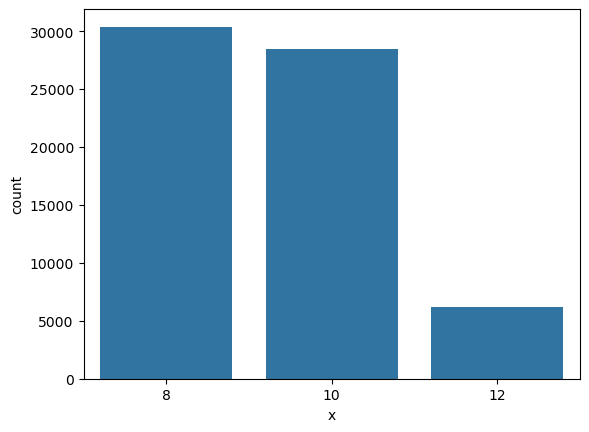

12: 0.0947814039408867
64960
10: 0.43754618226600983
8: 0.4676724137931034


In [8]:
hand_frequencies = []
for hand in dealt_hands:
    for index, row in hand.iterrows():
        #print("Row:")
        #print(row)
        column_names = np.where(row.iloc[:] == 0)
        #print("Column Indexes:")
        #print(column_names)
        for column in column_names:
            hand_frequencies.extend(hand.columns[column])
            #print("Column Index:")
            #print(column)
            #print("Column Suit Number:")
            #print(hand.columns[column])
#print(hand_frequencies)
df = pd.DataFrame(data = hand_frequencies, columns = ["x"], index = np.arange(len(hand_frequencies)))
sns.countplot(x = "x", data = df)
plt.show()
print("12: " + str(hand_frequencies.count(12)/len(hand_frequencies)))
print(len(hand_frequencies))
print("10: " + str(hand_frequencies.count(10)/len(hand_frequencies)))
print("8: " + str(hand_frequencies.count(8)/len(hand_frequencies)))


In [11]:
unmerged_distributions = [df.loc[:, i::4] for i in range(4)]
for distribution in unmerged_distributions:
    distribution.columns = ["0", "1", "2", "3", "4"]

# First look at card distributions of common, ten, and eight.

In [14]:
merged_distributions = pd.concat(unmerged_distributions)
common_freq = np.zeros(13)
ten_freq = np.zeros(11)
eight_freq = np.zeros(9)
merged_distributions

,0,1,2,3,4
0,12,3,4,1,4
1,8,3,1,1,3
2,8,2,1,4,1
3,12,2,4,3,3
4,12,4,3,2,3
...,...,...,...,...,...
999995,12,3,4,3,2
999996,8,1,4,2,1
999997,8,3,2,2,1
999998,12,2,4,5,1


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
for number, row in merged_distributions.iterrows():
    if row.iloc[0] == 12:
        for card in row.iloc[1:]:
            common_freq[card] += 1
    if row.iloc[0] == 10:
        for card in row.iloc[1:]:
            ten_freq[card] += 1
    if row.iloc[0] == 8:
        for card in row.iloc[1:]:
            eight_freq[card] += 1
            

In [ ]:
display(common_freq)
display(ten_freq)
display(eight_freq)

In [22]:
common_freq = common_freq/sum(common_freq)

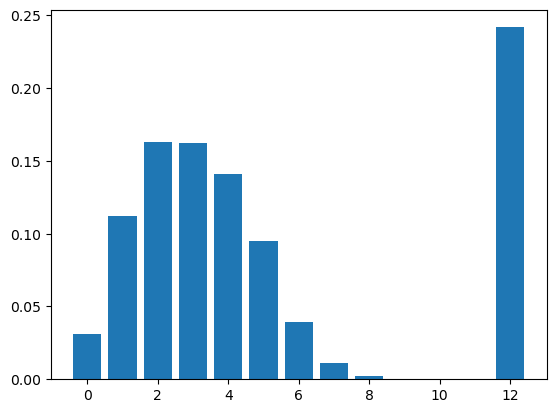

In [36]:
plt.bar(np.arange(13), common_freq)
plt.show()